# Did Russia win the 2016 US elections ?

## Introduction

On November 8th of 2016, the republican candidate Donald Trump becomes the 45th president of the USA. This does not correspond at all with all the opinions surveys made during the campaign, as according to them, it was supposed that Hillary Clinton win the elections. How could it possibly happen ?

Social media platforms have taken a great importance in our modern society. Social networks such as Facebook, Twitter or LinkedIn have become very powerful tools to spread a message. They allow a direct connection between parties or companies and citizens, and recent events such as the Arab Spring have shown they can be used as a driving force. However, in such media which favor free expression, the control is weak or inexistant and thus fake information can spread quickly, against the social good.

In order to see the impact social media can have on important social questions (such as US elections=, we chose the 3 Million Russian Troll Tweets dataset. This dataset contains tweets from the IRA (Internet Research Agency), which is a Russian company specialized in online propaganda to serve Russian interests. They notably ran a sophisticated and coordinated campaign to interfere in the 2016 US elections, supposedly to advocate against the democrat candidate Hillary Clinton. Our aim here is to to analyze Russia’s interference in these elections.

In order to analyze the influence of Russia, we will go through different aspects. First, we will describe some main politics-related events that happened during the election. Secondly, we will describe the dataset, and show how we keep the relevent features. Then in a third time, we will try to analyze as much as possible the dataset, by showing the evolution of the main politic-related events, and analyze the proportion of tweet that have been posted against Trump's administration, and Clinton's administration.

## Main politics-related events during the elections
During the US elections, many major events happened. 

### Hillary Clinton's scandale :

The first one, is the scandal about **Hillary Clinton's email**. Hillary Clinton used a private server to access her emails when she was Secretary of State. But FBI's chief (James Comey) announces 11 days before the elections, that new emails have been found. Donald Trump won't forget to use it in order to discredit the democrat candidate.

The second one is about **Hillary's malaise**. On 11th septembre, at the commemoration ceremony, Hillary Clinton is forced to leave as she is not feeling good. A pneumonia is diagnosed. As Trump keep saying that somebody has to be strong to govern the state, he keep saying that Hillary Clinton is not strong enough to govern the USA.

The third scandale happens when Hillary Clinton treats half of Trump's elector as pathetic people. As a revenge, Trump's try to attract some sympathy of everybody by ...

The last one is the **pizzagate conspiracy theory**. Indeed, on 30th of October 2016, a tweet appears on twitter saying that there exists a pedophilia network around John Podesta, Hillary Clinton's compaign director. These tweets got quickly viral, and the hashtag Pizzagate appeared on November 7th on twitter (one day before the elections).

### Donald Trump's scandale :

The first one is about a **2005 tape published by the Washington Post**. Donald Trump say sexist, and degrading words about women. This lead to some of his voters finally left his side.

The second one is about **Donald Trump's taxes**. On begininning of October, the New York Times reveals that Donald Trump may have declared in a doubtful way the bankruptcy of his casino, which may have help to pay less taxes. Hillary Clinton won't forget to make comment about it and attacking about the fact that he may have paid nothing to support schools, or veterans.

The last one happened when Donald Trump say disrespectful word about the father's of the army's captain, died in Irak in 2004. The public opinion has been disappointed about this event, which leads to many Republican to attack him.

### References
https://www.rtl.fr/actu/international/presidentielle-americaine-2016-les-6-rebondissements-de-la-campagne-7785551696 <br/>
https://en.wikipedia.org/wiki/Pizzagate_conspiracy_theory <br/>

## Import needed for the project

In [1]:
import pandas as pd 
import glob
import os
import numpy as np
import numpy.matlib
import datetime
import re
import matplotlib.pyplot as plt

## Dataset description

The datasets are available at the follwing URL :
* https://www.kaggle.com/fivethirtyeight/russian-troll-tweets : Dataset used at the beginning. Will be improved later by maybe adding the second dataset (see below).
* https://about.twitter.com/en_us/values/elections-integrity.html#data : Bigger datasets which is entirely dedicated to the US elections.

### Loading the dataset

In [2]:
PATH_DATA = "../../data"

In [3]:
filenames = glob.glob(os.path.join(PATH_DATA, "IRAhandle_tweets_*.csv"))
df = pd.concat((pd.read_csv(f) for f in filenames))
print('*'*66)
print('The shape of the whole dataframe is the following : {}'.format(df.shape))
print('*'*66)
df.head()

******************************************************************
The shape of the whole dataframe is the following : (2973371, 15)
******************************************************************


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel slippery floors https://t.co/R...,United States,Norwegian,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2160,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer


### Description of the dataset

The IRAhandle_tweets dataset, is the given dataset collected by the Internet Research Agency. It is a way to study in indeed Russia has helped electing Donald Trump during the US Elections of 2016, thanks to the help of many russian account that were used to discredit other participant.

The dataset has different columns :
* external_author_id : the id of the author
* author : the username of the author of the tweet
* content : the content of the tweet
* region : the region were the tweet has been posted, or retweeted
* language : the language of the tweet
* publish_dte : the date when the tweet has been posted or retweeted
* harvested_date : ???
* folowing : How many people is the publisher following at the publication date
* followers : By how many people is the publisher followed at the publication date
* Updates : ???
* post_type : if the tweet is posted or retweeted
* account_type : the type of account of the publisher
* new_june_2018 : ???
* retweet : TRUE or FALSE, TRUE if it is a retweet
* account_category : ???

In [4]:
df.dtypes

external_author_id    float64
author                 object
content                object
region                 object
language               object
publish_date           object
harvested_date         object
following               int64
followers               int64
updates                 int64
post_type              object
account_type           object
new_june_2018           int64
retweet                 int64
account_category       object
dtype: object

In [5]:
df.describe(include="all")

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
count,2.973367e+06,2973371,2973370,2964528,2973371,2973371,2973371,2.973371e+06,2.973371e+06,2.973371e+06,1310946,2973008,2.973371e+06,2.973371e+06,2973371
unique,NaN,2848,2365942,36,56,896684,906316,NaN,NaN,NaN,2,20,NaN,NaN,8
top,NaN,EXQUOTE,В городе Сочи. Олимпиада – праздник или стихий...,United States,English,8/16/2017 1:29,3/22/2016 17:35,NaN,NaN,NaN,RETWEET,Russian,NaN,NaN,NonEnglish
freq,NaN,59652,670,2055882,2128963,202,1333,NaN,NaN,NaN,1270702,721191,NaN,NaN,837725
mean,1.296128e+17,NaN,NaN,NaN,NaN,NaN,NaN,3.433524e+03,7.018913e+03,1.049756e+04,NaN,NaN,2.078735e-01,4.408955e-01,NaN
std,3.036341e+17,NaN,NaN,NaN,NaN,NaN,NaN,5.609881e+03,1.458463e+04,1.768729e+04,NaN,NaN,4.057859e-01,4.964945e-01,NaN
min,3.497640e+07,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,-1.000000e+00,-1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.930748e+09,NaN,NaN,NaN,NaN,NaN,NaN,3.270000e+02,3.200000e+02,1.787000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.581835e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.499000e+03,1.274000e+03,4.333000e+03,NaN,NaN,0.000000e+00,0.000000e+00,NaN
75%,3.254274e+09,NaN,NaN,NaN,NaN,NaN,NaN,4.730000e+03,1.060000e+04,1.234100e+04,NaN,NaN,0.000000e+00,1.000000e+00,NaN


#### Proportion of quote tweet per region/language/account category

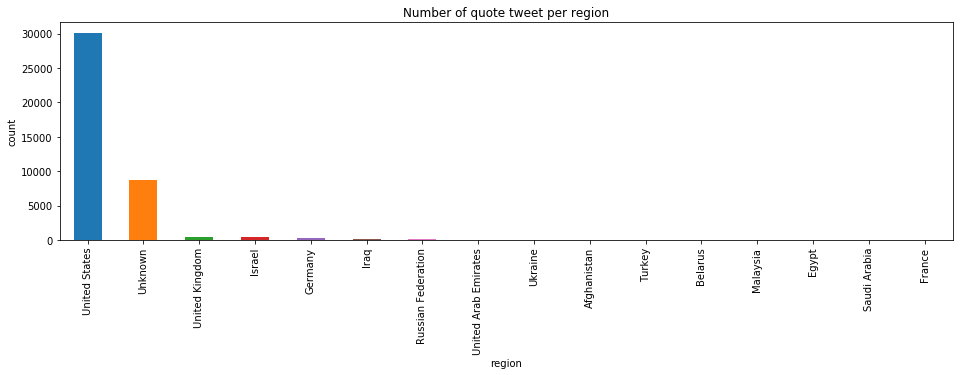

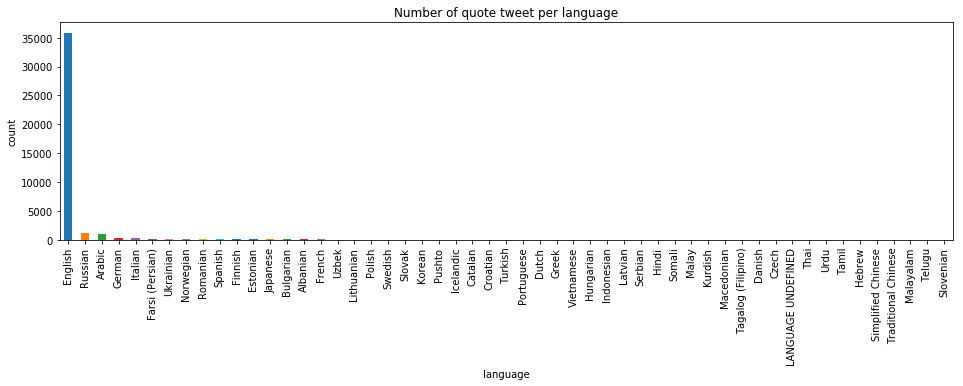

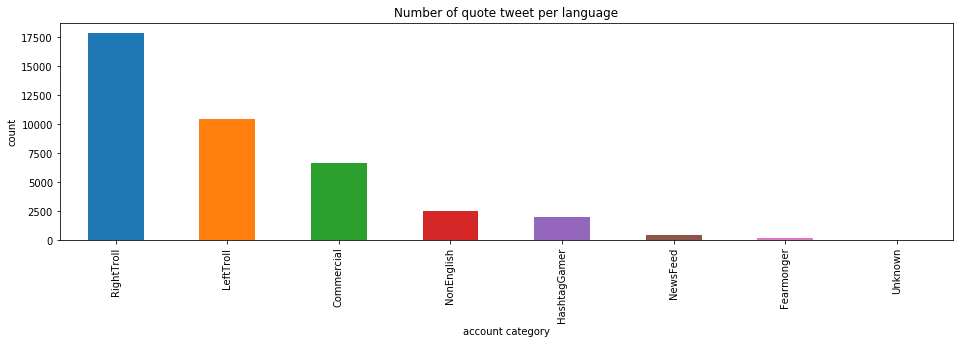

In [6]:
# Select only the quote tweet
quote_tweet_df = df.loc[df['post_type'] == 'QUOTE_TWEET']

# Plot the number of quote tweet per region
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['region'].value_counts().plot.bar()
ax.set_xlabel('region')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per region')

# Plot the number of quote tweet per language
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['language'].value_counts().plot.bar()
ax.set_xlabel('language')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per language')

# Plot the number of quote tweet per account category
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['account_category'].value_counts().plot.bar()
ax.set_xlabel('account category')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per language')

plt.show()

#### Proportion of all tweets (including the retweet) per region/language

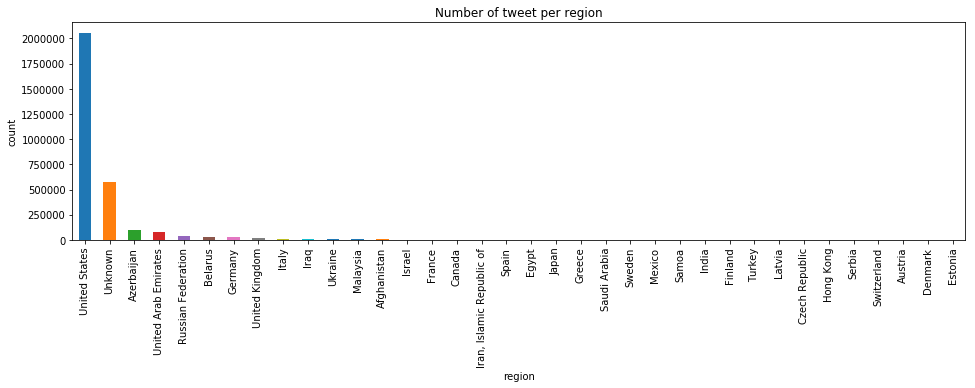

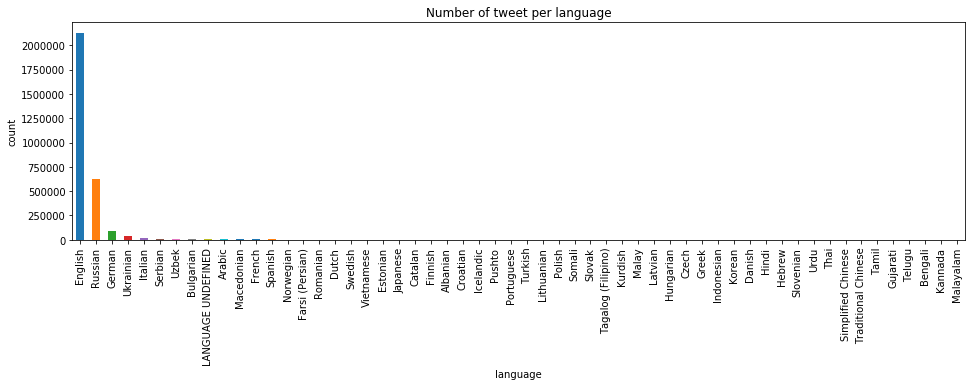

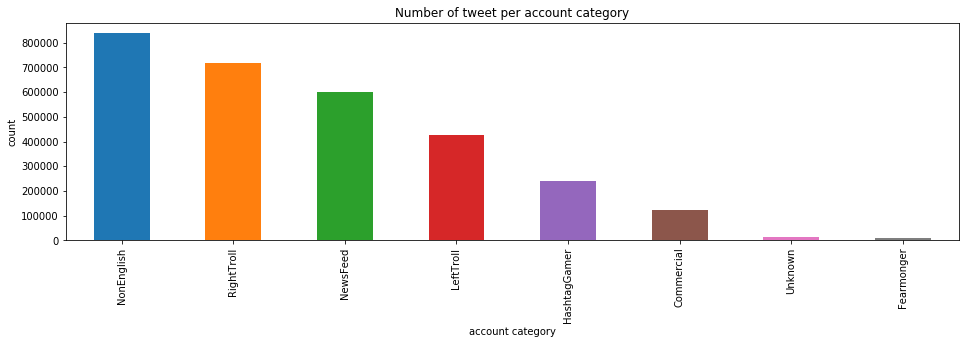

In [7]:
# Plot the number of tweet per region
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = df['region'].value_counts().plot.bar()
ax.set_xlabel('region')
ax.set_ylabel('count')
ax.set_title('Number of tweet per region')

# Plot the number of tweet per language
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = df['language'].value_counts().plot.bar()
ax.set_xlabel('language')
ax.set_ylabel('count')
ax.set_title('Number of tweet per language')

# Plot the number of tweet per account category
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = df['account_category'].value_counts().plot.bar()
ax.set_xlabel('account category')
ax.set_ylabel('count')
ax.set_title('Number of tweet per account category')

plt.show()

#### NaN and unique values for each column of the dataset

In [8]:
# Region
print('*'*70+'\nRegion description : \n')
print('The different regions are : \n {}'.format(df['region'].unique()))
N_null = df['region'].isnull().sum()
percentage = float(N_null)/float(df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))
N_null = df[df['region'] == 'Unknown'].shape[0]
percentage = float(N_null)/float(df.shape[0])
print('The number of unknown values is : {} ({} %)'.format(N_null, 100*percentage))

# Language
print('*'*70+'\nLanguage description : \n')
print('The different languages are : \n {}'.format(df['language'].unique()))
N_null = df[df['language'] == 'LANGUAGE UNDEFINED'].shape[0]
percentage = float(N_null)/float(df.shape[0])
print('\nThe number of LANGUAGE UNDEFINED is : {} ({} %)'.format(N_null, 100*percentage))

# Post type
print('*'*70+'\nPost type description : \n')
print('The different post types are : \n {}'.format(df['post_type'].unique()))
N_null = df['post_type'].isnull().sum()
percentage = float(N_null)/float(df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))

# Account type
print('*'*70+'\nAccount type description : \n')
print('The different account types are : \n {}'.format(df['account_type'].unique()))
N_null = df['account_type'].isnull().sum()
percentage = float(N_null)/float(df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))
N_null = df[df['account_type'] == '?'].shape[0]
percentage = float(N_null)/float(df.shape[0])
print('The number of ? is : {} ({} %)'.format(N_null, 100*percentage))

# Account category
print('*'*70+'\nAccount category description : \n')
print('The different account categories are : \n {}'.format(df['account_category'].unique()))
N_null = df[df['account_category'] == 'Unknown'].shape[0]
percentage = float(N_null)/float(df.shape[0])
print('The number of unknown values is : {} ({} %)'.format(N_null, 100*percentage))

# Retweet
print('*'*70+'\nRetweet description : \n')
print('The different values for retweet are : \n {}'.format(df['retweet'].unique()))
N_null = df['retweet'].isnull().sum()
percentage = float(N_null)/float(df.shape[0])
print('The number of null values is : {} ({} %)'.format(N_null, 100*percentage))

print('*'*70)

**********************************************************************
Region description : 

The different regions are : 
 ['United States' 'Spain' 'Unknown' 'Russian Federation'
 'United Arab Emirates' 'Italy' 'Azerbaijan' nan 'Afghanistan' 'Japan'
 'Germany' 'Saudi Arabia' 'Iraq' 'Israel' 'Egypt' 'Belarus'
 'Iran, Islamic Republic of' 'Mexico' 'Canada' 'France' 'United Kingdom'
 'Malaysia' 'Turkey' 'Ukraine' 'Serbia' 'Hong Kong' 'Austria' 'Samoa'
 'India' 'Greece' 'Czech Republic' 'Finland' 'Latvia' 'Estonia' 'Sweden'
 'Denmark' 'Switzerland']

The number of null values is : 8843 (0.297406546307 %)
The number of unknown values is : 572767 (19.263220096 %)
**********************************************************************
Language description : 

The different languages are : 
 ['English' 'Norwegian' 'Farsi (Persian)' 'French' 'Dutch' 'Vietnamese'
 'Italian' 'Latvian' 'Spanish' 'Lithuanian' 'Albanian' 'Romanian' 'German'
 'Finnish' 'Swedish' 'Icelandic' 'Russian' 'Ukrainian' 'Jap

Given the above results, we can remove the rows, where region or language are not known.

In [9]:
# Extract minimum and maximum date
print('The minimum date in the dataset is {}'.format(df['publish_date'].min()))
print('The maximum date in the dataset is {}'.format(df['publish_date'].max()))
N_null = df['publish_date'].isnull().sum()
percentage = float(N_null)/float(df.shape[0])
print('The number of null date values is : {} ({} %)'.format(N_null, 100*percentage))

The minimum date in the dataset is 1/1/2013 16:16
The maximum date in the dataset is 9/9/2017 9:51
The number of null date values is : 0 (0.0 %)


## Cleaning the dataset

In order to use the dataset, we first have to clean it. For this purpose, we will study, and select only certain row according to the following criteriae :
* First, we suppose that only the english tweet will be used. Indeed, as the disinformation is supposed to be done in USA, it is relevant to keep only the tweet that have been posted in english.
* Second, Donald Trump has been elected officially the 19th of december 2016. As the primary to these elections have begun on february the same year, it can be relevant to keep an interval of one year before the elections date.
* Thirdly, some tweets are posted in one sentence, delimited by capital letters. In this case, the one word sentences have to be separated to help the research in a easier manner. However, alle the tweets can be posted with capital letters, so, for easier computations, it is more relevant to cast them in only lowercase sentences.

In [166]:
# Keep only english tweets
english_df = df[df['language'].astype(str).str.contains('English')]
english_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer


In [188]:
# Keep only interesting time interval
start_date = '11/8/2015 00:00'
end_date = '11/8/2016 23:59'

print('Previous time interval is : {} -> {}'.format(english_df['publish_date'].min(), \
                                                    english_df['publish_date'].max()))

old_N = english_df.shape[0]

english_df = english_df[english_df['publish_date'] <= end_date]
english_df = english_df[english_df['publish_date'] >= start_date]

print('New time interval is : {} -> {}'.format(english_df['publish_date'].min(), \
                                               english_df['publish_date'].max()))
new_N = english_df.shape[0]
print('{} % of the dataframe have been kept'.format(float(new_N)/float(old_N)*100))

Previous time interval is : 1/1/2013 16:16 -> 9/9/2017 7:26
New time interval is : 11/8/2015 0:00 -> 11/8/2016 23:59
0.26764203981 % of the dataframe have been kept


In [168]:
# Separate one word sentences and cast it to lowercase characters
#english_df['content'] = english_df.apply(lambda x : (' '.join(re.sub( r"([A-Z])", r" \1", x['content']).split())).lower(), axis=1)
#english_df['content'] = english_df.apply(lambda x : x['content'].lower(), axis=1)
#english_df.head()
# Only cast it to lowercase characters
english_df['content'] = english_df.apply(lambda x : str(x['content']).lower(), axis=1)
english_df.head()

/home/desarzens/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,people are too toxic. i think i have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#nowplaying don't shoot (i'm a man) by @devo -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'i'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#myachillesheel boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,your opinion on hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer


## Analysis part

### Scandale research

As seen in the introduction, we have seen different scandale in which we are interested. Therefore, we will study the following hashtags or keywords :
* Hillary Clinton's Email scandale : ['hillary' 'mail'] or ['clinton' 'mail']
* Hillary Clinton's malaise : ['hillary' 'malaise'] or ['hillary' 'faint'] or ['clinton' 'malaise'] or ['clinton' 'faint']
* Hillary insulting Trump's voter : ['hillary' 'insult' 'trump' 'elector'] or ['hillary' 'insult' 'trump' 'elector']
* Pizzagate scandale : ['pizzagate']
* Donald Trump's bankruptcy : '[trump' 'bankruptcy'] or ['donald' 'bankruptcy']
* Donald Trump's taxes : ['trump' 'taxe'] or ['donald' 'taxe']
* Donald Trump's sexist tape : ['trump' 'sexist' 'tape'] or ['donald' 'sexist' 'tape']
* Donald Trump insulting the army chief's father : ['trump' 'army' 'father'] or ['trump' 'khan'] or ['donald' 'army' 'father'] or ['donald' 'khan']

To see the impact of each scandale, we will look for different results :
* Time on which all the quote tweet were published (distribution in time)
* Showing the 10 most active user that tweeted something about him during the time period
* For the 10 most viral tweets, show how the number of retweet evolved in function off the time
* The number of tweets corresponding to the each account category
* TBD

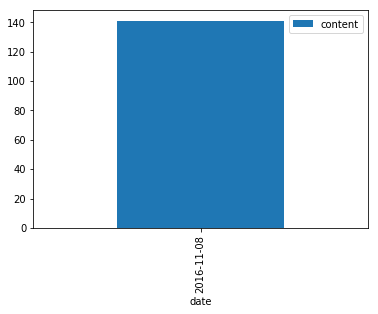

In [189]:
keywords = ['neverhillary']

scandale_df = english_df.copy()
for keyword in keywords :
    scandale_df = scandale_df[scandale_df['content'].astype(str).str.contains(keyword)]

scandale_df.head()
scandale_df['date'] = pd.to_datetime(scandale_df['publish_date'], format='%m/%d/%Y %H:%M').dt.date
time_evolution = scandale_df[['date', 'content']].groupby('date').count()
time_evolution.plot.bar()
plt.show()

In [197]:
test = '11/8/2015 0:00'
english_df[english_df['publish_date'] == test]

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
305659,3.523088e+09,POLIGRAPHME,https://t.co/k685zunyvh,United States,English,11/8/2015 0:00,11/9/2015 8:18,4507,1349,141,NaN,?,0,0,Unknown


In [122]:
"""quote_tweet_df = english_df[english_df['retweet'] == 0]
retweet_df = english_df[english_df['retweet'] == 1]

keywords = ['pizzagate']

scandale_quote_df = quote_tweet_df.copy()
for keyword in keywords :
    scandale_quote_df = scandale_quote_df[scandale_quote_df['content'].astype(str).str.contains(keyword)]

scandale_quote_df['content'].unique().shape


scandale_retweet_df = retweet_df.copy()
for keyword in keywords :
    scandale_retweet_df = scandale_retweet_df[scandale_retweet_df['content'].astype(str).str.contains(keyword)]

scandale_retweet_df['content'].unique().shape"""

(205,)

## Trying the big dataset

In [208]:
#big_dataset_df = pd.read_csv(PATH_DATA + '/ira_tweets_csv_hashed.csv')
big_dataset_df.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
615,845930358671495168,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,United States,No more #HappyHolidays shit!!! It's #MerryChri...,https://t.co/XFnhCqCWBy,2748,265,2016-06-15,...,NaN,NaN,0.0,0.0,0.0,0.0,"[missingdcgirls, pizzagate, pedogate]",[https://twitter.com/gal_deplorable/status/845...,[2746979823],NaN
7198,843396937843904512,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,United States,No more #HappyHolidays shit!!! It's #MerryChri...,https://t.co/XFnhCqCWBy,2748,265,2016-06-15,...,NaN,NaN,0.0,0.0,0.0,0.0,"[MAGA, LockHerUp, pizzagate, TrumpTrain, Ameri...",[],[768019986],NaN
11687,806325775238512640,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,United States,No more #HappyHolidays shit!!! It's #MerryChri...,https://t.co/XFnhCqCWBy,2748,265,2016-06-15,...,NaN,NaN,0.0,0.0,0.0,0.0,[pizzagate],[],[795022671461261312],NaN
23256,853220135515164672,74c5eb30de3d6691e150879ee8528463c70b0feaefed97...,74c5eb30de3d6691e150879ee8528463c70b0feaefed97...,74c5eb30de3d6691e150879ee8528463c70b0feaefed97...,"Georgia, USA",Working - Music geek + Blacker than BlackHole,NaN,965,597,2013-08-21,...,NaN,NaN,0.0,0.0,0.0,0.0,"[pizzagate, pedogate]",[],[837861986058686464],NaN
53060,827625364696469510,396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c65...,396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c65...,396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c65...,USA,~Reagan Conservative ~Jesus Lover ~PRO-Israel ...,NaN,2372,2616,2013-08-14,...,NaN,NaN,0.0,0.0,0.0,0.0,"[pizzagate, connecticut, georgia, crookedHillary]",[https://twitter.com/notmanipulated7/status/82...,[347234638],NaN


In [210]:
big_dataset_df.dtypes

tweetid                       int64
userid                       object
user_display_name            object
user_screen_name             object
user_reported_location       object
user_profile_description     object
user_profile_url             object
follower_count                int64
following_count               int64
account_creation_date        object
account_language             object
tweet_language               object
tweet_text                   object
tweet_time                   object
tweet_client_name            object
in_reply_to_tweetid         float64
in_reply_to_userid           object
quoted_tweet_tweetid        float64
is_retweet                     bool
retweet_userid               object
retweet_tweetid             float64
latitude                    float64
longitude                   float64
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_count               float64
hashtags                    

In [213]:
"""keywords = ['pizzagate']

for keyword in keywords :
    big_dataset_df = big_dataset_df[big_dataset_df['hashtags'].astype(str).str.contains(keyword)]

scandale_df = big_dataset_df.copy()
scandale_df.head()
scandale_df['date'] = pd.to_datetime(scandale_df['creation_date'], format='%m/%d/%Y %H:%M').dt.date
time_evolution = scandale_df[['date', 'content']].groupby('date').count()
time_evolution.plot.bar()
plt.show()"""

new_df = big_dataset_df[['tweetid', 'userid', 'tweet_language', 'tweet_time', 'tweet_text', 'in_reply_to_tweetid', 'is_retweet', 'retweet_count']]
new_df.head()

,tweetid,userid,tweet_language,tweet_time,tweet_text,in_reply_to_tweetid,is_retweet,retweet_count
615,845930358671495168,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,en,2017-03-26 09:28,RT @UTHornsRawk: #missingdcgirls Government e...,NaN,True,0.0
7198,843396937843904512,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,en,2017-03-19 09:41,RT @sealeney: Seth Rich MURDERED! #MAGA #LockH...,NaN,True,0.0
11687,806325775238512640,a95a911dd6ae864c48ed062cdbe75e5c28dbe0cf57c6db...,und,2016-12-07 02:33,RT @cbanks420lol2: #pizzagate https://t.co/Pn3...,NaN,True,0.0
23256,853220135515164672,74c5eb30de3d6691e150879ee8528463c70b0feaefed97...,en,2017-04-15 12:15,RT @Janeken67337418: #pizzagate #pedogate 2 ju...,NaN,True,0.0
53060,827625364696469510,396b0b6914e425ca53c49b7f1d6cfe9757eb7368c04c65...,en,2017-02-03 21:10,RT @Bonacker69: #pizzagate ? Whoa! Arrests in ...,NaN,True,0.0
